In [65]:
#data extraction

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!pwd

/content


In [36]:
!ls
#list all the documents

drive  sample_data


In [37]:
import pandas as pd


In [38]:
df_bookings = pd.read_csv('/content/drive/MyDrive/Hotel Analaysis project dataset/datasets/fact_bookings.csv')

In [39]:
df_bookings.head(10)

##show the first 10 rows

booking_id  property_id booking_date check_in_date checkout_date  \
0   May012216558RT11        16558     27-04-22      1/5/2022      2/5/2022   
1   May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
2   May012216558RT13        16558     28-04-22      1/5/2022      4/5/2022   
3   May012216558RT14        16558     28-04-22      1/5/2022      2/5/2022   
4   May012216558RT15        16558     27-04-22      1/5/2022      2/5/2022   
5   May012216558RT16        16558     1/5/2022      1/5/2022      3/5/2022   
6   May012216558RT17        16558     28-04-22      1/5/2022      6/5/2022   
7   May012216558RT18        16558     26-04-22      1/5/2022      3/5/2022   
8   May012216558RT19        16558     30-04-22      1/5/2022      2/5/2022   
9  May012216558RT110        16558     28-04-22      1/5/2022      2/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0       -3.0           RT1    direct online            1.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        2.0           RT1          logtrip            5.0    Checked Out   
3       -2.0           RT1           others            NaN      Cancelled   
4        4.0           RT1    direct online            5.0    Checked Out   
5        2.0           RT1           others            4.0    Checked Out   
6        2.0           RT1           others            NaN      Cancelled   
7        2.0           RT1          logtrip            NaN        No Show   
8        2.0           RT1         tripster            NaN    Checked Out   
9        1.0           RT1           others            4.0    Checked Out   

   revenue_generated  revenue_realized  
0              10010             10010  
1               9100              3640  
2            9100000              9100  
3               9100              3640  
4              10920             10920  
5               9100              9100  
6               9100              3640  
7               9100              9100  
8               9100              9100  
9               9100              9100

In [40]:
df_bookings.shape
## 134580 rows and 12 columns

(134590, 12)

In [41]:
df_bookings.room_category
## shows all the list of the room(repetative) from 1 to  134589

0         RT1
1         RT1
2         RT1
3         RT1
4         RT1
         ... 
134585    RT4
134586    RT4
134587    RT4
134588    RT4
134589    RT4
Name: room_category, Length: 134590, dtype: object

In [42]:
df_bookings.room_category.unique()
##RT1', 'RT2', 'RT3', 'RT4' shows the unique room only

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [43]:
df_bookings.booking_platform.unique()
#booking platforms direct online,others,logtrip,tripster,makeyourtrip,....


array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [44]:
df_bookings.booking_platform.value_counts()
## how many bookings are done through each platforms

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

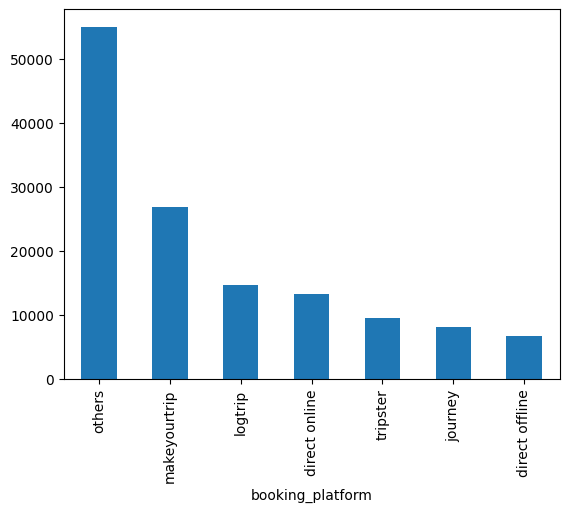

In [45]:
df_bookings.booking_platform.value_counts().plot(kind="bar")
#bar chart plot of the booking platforms

In [47]:
df_bookings.describe()
##mean standard deviation minimum of the given column(data)

property_id      no_guests  ratings_given  revenue_generated  \
count  134590.000000  134587.000000   56683.000000       1.345900e+05   
mean    18061.113493       2.036170       3.619004       1.537805e+04   
std      1093.055847       1.034885       1.235009       9.303604e+04   
min     16558.000000     -17.000000       1.000000       6.500000e+03   
25%     17558.000000       1.000000       3.000000       9.900000e+03   
50%     17564.000000       2.000000       4.000000       1.350000e+04   
75%     18563.000000       2.000000       5.000000       1.800000e+04   
max     19563.000000       6.000000       5.000000       2.856000e+07   

       revenue_realized  
count     134590.000000  
mean       12696.123256  
std         6928.108124  
min         2600.000000  
25%         7600.000000  
50%        11700.000000  
75%        15300.000000  
max        45220.000000

In [48]:
df_date = pd.read_csv('/content/drive/MyDrive/Hotel Analaysis project dataset/datasets/dim_date.csv')

In [49]:
df_hotels = pd.read_csv('/content/drive/MyDrive/Hotel Analaysis project dataset/datasets/dim_hotels.csv')

In [50]:
df_rooms = pd.read_csv('/content/drive/MyDrive/Hotel Analaysis project dataset/datasets/dim_rooms.csv')

In [51]:
df_aggregated_bookings = pd.read_csv('/content/drive/MyDrive/Hotel Analaysis project dataset/datasets/fact_aggregated_bookings.csv')

In [54]:
df_hotels.shape
##25 hotels

(25, 4)

In [56]:
df_hotels.head(5)

property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi

In [57]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [60]:
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

In [63]:
df_hotels.city.value_counts().sort_values().plot(kind="density")

<Axes: ylabel='Density'>

In [64]:
##data cleaning

In [66]:
df_bookings.no_guests<=0
##this only shows true and false

0          True
1         False
2         False
3          True
4         False
          ...  
134585    False
134586     True
134587    False
134588    False
134589    False
Name: no_guests, Length: 134590, dtype: bool

In [109]:
df_bookings[df_bookings.no_guests<=0]

Empty DataFrame
Columns: [booking_id, property_id, booking_date, check_in_date, checkout_date, no_guests, room_category, booking_platform, ratings_given, booking_status, revenue_generated, revenue_realized]
Index: []

In [69]:
df_bookings.no_guests>0

0         False
1          True
2          True
3         False
4          True
          ...  
134585     True
134586    False
134587     True
134588     True
134589     True
Name: no_guests, Length: 134590, dtype: bool

In [78]:
df_bookings=df_bookings[df_bookings.no_guests>0]
df_bookings.shape

(134578, 12)

In [106]:
df_bookings

booking_id  property_id booking_date check_in_date  \
1        May012216558RT12        16558     30-04-22      1/5/2022   
4        May012216558RT15        16558     27-04-22      1/5/2022   
5        May012216558RT16        16558     1/5/2022      1/5/2022   
6        May012216558RT17        16558     28-04-22      1/5/2022   
7        May012216558RT18        16558     26-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134584   Jul312217564RT45        17564     30-07-22      31-07-22   
134585   Jul312217564RT46        17564     29-07-22      31-07-22   
134587   Jul312217564RT48        17564     30-07-22      31-07-22   
134588   Jul312217564RT49        17564     29-07-22      31-07-22   
134589  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
1           2/5/2022        2.0           RT1           others            NaN   
4           2/5/2022        4.0           RT1    direct online            5.0   
5           3/5/2022        2.0           RT1           others            4.0   
6           6/5/2022        2.0           RT1           others            NaN   
7           3/5/2022        2.0           RT1          logtrip            NaN   
...              ...        ...           ...              ...            ...   
134584      1/8/2022        2.0           RT4           others            2.0   
134585      3/8/2022        1.0           RT4     makeyourtrip            2.0   
134587      2/8/2022        1.0           RT4         tripster            NaN   
134588      1/8/2022        2.0           RT4          logtrip            2.0   
134589      1/8/2022        2.0           RT4     makeyourtrip            NaN   

       booking_status  revenue_generated  revenue_realized  
1           Cancelled               9100              3640  
4         Checked Out              10920             10920  
5         Checked Out               9100              9100  
6           Cancelled               9100              3640  
7             No Show               9100              9100  
...               ...                ...               ...  
134584    Checked Out              32300             32300  
134585    Checked Out              32300             32300  
134587      Cancelled              32300             12920  
134588    Checked Out              32300             32300  
134589      Cancelled              32300             12920  

[134573 rows x 12 columns]

In [80]:
df_bookings.revenue_generated.min()
##minimum value of the revenue generated of the single person

6500

In [82]:
df_bookings.revenue_generated.max()
##maximum value of the revenue generated of the single person which is not possible for this dataset of the hotel (in billion )

28560000

In [110]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(14915.959776478194, 13500.0)

In [83]:
##outliers removal by three standard deviation
##value greater than 3 standard deviated they are considered as outlier


In [107]:
avg,std =df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
#the given std is one standard deviation

In [108]:
avg, std

(14915.959776478194, 6452.676164334521)

In [101]:
higher_limit= avg + 3 * std
## no value of room higher than this are accepted. Higher than this are outlier



In [102]:
lower_limit= avg - 3 * std
lower_limit

-4442.068716525369

In [94]:
##check the outliers
df_bookings[df_bookings.revenue_generated>higher_limit]

booking_id  property_id booking_date check_in_date  \
2        May012216558RT13        16558     28-04-22      1/5/2022   
111      May012216559RT32        16559     29-04-22      1/5/2022   
315      May012216562RT22        16562     28-04-22      1/5/2022   
562     May012217559RT118        17559     26-04-22      1/5/2022   
129176   Jul282216562RT26        16562     21-07-22      28-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
2           4/5/2022        2.0           RT1          logtrip            5.0   
111         2/5/2022        6.0           RT3    direct online            NaN   
315         4/5/2022        2.0           RT2   direct offline            3.0   
562         2/5/2022        2.0           RT1           others            NaN   
129176      29-07-22        2.0           RT2    direct online            3.0   

       booking_status  revenue_generated  revenue_realized  
2         Checked Out            9100000              9100  
111       Checked Out           28560000             28560  
315       Checked Out           12600000             12600  
562         Cancelled            2000000              4420  
129176    Checked Out           10000000             12600

In [97]:
##remove the outliers
df_bookings=df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134573, 12)

In [ ]:
##for  revenue_realized

In [98]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [111]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [112]:
df_bookings[df_bookings.revenue_realized>higher_limit]

booking_id  property_id booking_date check_in_date  \
137      May012216559RT41        16559     27-04-22      1/5/2022   
139      May012216559RT43        16559     1/5/2022      1/5/2022   
143      May012216559RT47        16559     28-04-22      1/5/2022   
149     May012216559RT413        16559     24-04-22      1/5/2022   
222      May012216560RT45        16560     30-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134328   Jul312219560RT49        19560     31-07-22      31-07-22   
134331  Jul312219560RT412        19560     31-07-22      31-07-22   
134467   Jul312219562RT45        19562     28-07-22      31-07-22   
134474  Jul312219562RT412        19562     25-07-22      31-07-22   
134581   Jul312217564RT42        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
137         7/5/2022        4.0           RT4           others            NaN   
139         2/5/2022        6.0           RT4         tripster            3.0   
143         3/5/2022        3.0           RT4           others            5.0   
149         7/5/2022        5.0           RT4          logtrip            NaN   
222         3/5/2022        5.0           RT4           others            3.0   
...              ...        ...           ...              ...            ...   
134328      2/8/2022        6.0           RT4    direct online            5.0   
134331      1/8/2022        6.0           RT4           others            2.0   
134467      1/8/2022        6.0           RT4     makeyourtrip            4.0   
134474      6/8/2022        5.0           RT4   direct offline            5.0   
134581      1/8/2022        4.0           RT4     makeyourtrip            4.0   

       booking_status  revenue_generated  revenue_realized  
137       Checked Out              38760             38760  
139       Checked Out              45220             45220  
143       Checked Out              35530             35530  
149       Checked Out              41990             41990  
222       Checked Out              34580             34580  
...               ...                ...               ...  
134328    Checked Out              39900             39900  
134331    Checked Out              39900             39900  
134467    Checked Out              39900             39900  
134474    Checked Out              37050             37050  
134581    Checked Out              38760             38760  

[1299 rows x 12 columns]

In [114]:
df_bookings[df_bookings.room_category=="RT4"]

booking_id  property_id booking_date check_in_date  \
47       May012216558RT41        16558     26-04-22      1/5/2022   
48       May012216558RT42        16558     27-04-22      1/5/2022   
49       May012216558RT43        16558     29-04-22      1/5/2022   
137      May012216559RT41        16559     27-04-22      1/5/2022   
138      May012216559RT42        16559    11/4/2022      1/5/2022   
...                   ...          ...          ...           ...   
134584   Jul312217564RT45        17564     30-07-22      31-07-22   
134585   Jul312217564RT46        17564     29-07-22      31-07-22   
134587   Jul312217564RT48        17564     30-07-22      31-07-22   
134588   Jul312217564RT49        17564     29-07-22      31-07-22   
134589  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
47          3/5/2022        2.0           RT4          logtrip            NaN   
48          2/5/2022        1.0           RT4         tripster            NaN   
49          4/5/2022        2.0           RT4   direct offline            NaN   
137         7/5/2022        4.0           RT4           others            NaN   
138         3/5/2022        2.0           RT4   direct offline            NaN   
...              ...        ...           ...              ...            ...   
134584      1/8/2022        2.0           RT4           others            2.0   
134585      3/8/2022        1.0           RT4     makeyourtrip            2.0   
134587      2/8/2022        1.0           RT4         tripster            NaN   
134588      1/8/2022        2.0           RT4          logtrip            2.0   
134589      1/8/2022        2.0           RT4     makeyourtrip            NaN   

       booking_status  revenue_generated  revenue_realized  
47          Cancelled              26600             10640  
48        Checked Out              26600             26600  
49          Cancelled              26600             10640  
137       Checked Out              38760             38760  
138         Cancelled              32300             12920  
...               ...                ...               ...  
134584    Checked Out              32300             32300  
134585    Checked Out              32300             32300  
134587      Cancelled              32300             12920  
134588    Checked Out              32300             32300  
134589      Cancelled              32300             12920  

[16071 rows x 12 columns]

In [115]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [ ]:
##calculate outliers
## mean+3 *sd=23439.308444+ 9048.599076=50k
##here max value is 45220 and outliers is outside the range ko 50 k so there is no outliers


In [116]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [117]:
#Data Transformation

In [118]:
df_aggregated_bookings.head()

property_id check_in_date room_category  successful_bookings  capacity
0        16559      1-May-22           RT1                   25      30.0
1        19562      1-May-22           RT1                   28      30.0
2        19563      1-May-22           RT1                   23      30.0
3        17558      1-May-22           RT1                   30      19.0
4        16558      1-May-22           RT1                   18      19.0

In [119]:
df_aggregated_bookings["occupied_percentage"]=df_aggregated_bookings["successful_bookings"]/df_aggregated_bookings["capacity"]

In [121]:
df_aggregated_bookings

property_id check_in_date room_category  successful_bookings  capacity  \
0           16559      1-May-22           RT1                   25      30.0   
1           19562      1-May-22           RT1                   28      30.0   
2           19563      1-May-22           RT1                   23      30.0   
3           17558      1-May-22           RT1                   30      19.0   
4           16558      1-May-22           RT1                   18      19.0   
...           ...           ...           ...                  ...       ...   
9195        16563     31-Jul-22           RT4                   13      18.0   
9196        16559     31-Jul-22           RT4                   13      18.0   
9197        17558     31-Jul-22           RT4                    3       6.0   
9198        19563     31-Jul-22           RT4                    3       6.0   
9199        17561     31-Jul-22           RT4                    3       4.0   

      occupied_percentage  
0                0.833333  
1                0.933333  
2                0.766667  
3                1.578947  
4                0.947368  
...                   ...  
9195             0.722222  
9196             0.722222  
9197             0.500000  
9198             0.500000  
9199             0.750000  

[9200 rows x 6 columns]

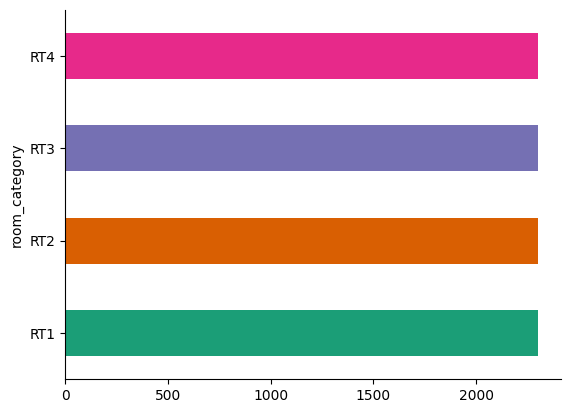

In [126]:
# @title room_category

from matplotlib import pyplot as plt
import seaborn as sns
df_aggregated_bookings.groupby('room_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

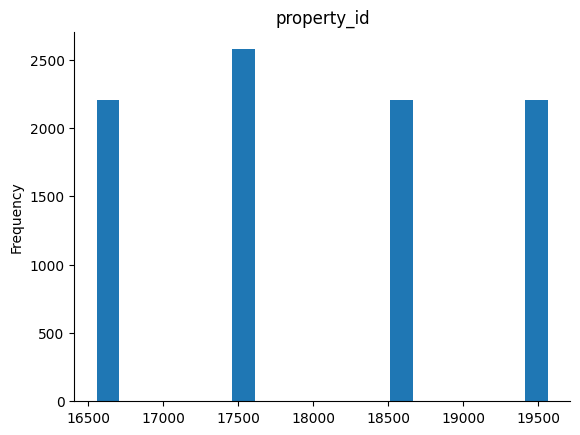

In [125]:
# @title property_id

from matplotlib import pyplot as plt
df_aggregated_bookings['property_id'].plot(kind='hist', bins=20, title='property_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
##apply the lambda fun to transform into percentage

In [123]:
df_aggregated_bookings["occupied_percentage"]=df_aggregated_bookings["occupied_percentage"].apply(lambda x: round(x *100,2))

In [124]:
df_aggregated_bookings["occupied_percentage"]

0        83.33
1        93.33
2        76.67
3       157.89
4        94.74
         ...  
9195     72.22
9196     72.22
9197     50.00
9198     50.00
9199     75.00
Name: occupied_percentage, Length: 9200, dtype: float64

In [127]:
df_aggregated_bookings.groupby("room_category")["occupied_percentage"]


In [128]:
df_aggregated_bookings.groupby("room_category")["occupied_percentage"].mean()

room_category
RT1    58.224247
RT2    58.040278
RT3    58.028213
RT4    59.300461
Name: occupied_percentage, dtype: float64

In [129]:
df_rooms

room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential

In [130]:
##merge two data frame . Note that here the column name is not same to merge but the content are same one is room_category one is room_id so we use left_on and right_on
df=pd.merge(df_aggregated_bookings,df_rooms,left_on="room_category", right_on="room_id")

In [131]:
df.head(10)

property_id check_in_date room_category  successful_bookings  capacity  \
0        16559      1-May-22           RT1                   25      30.0   
1        19562      1-May-22           RT1                   28      30.0   
2        19563      1-May-22           RT1                   23      30.0   
3        17558      1-May-22           RT1                   30      19.0   
4        16558      1-May-22           RT1                   18      19.0   
5        17560      1-May-22           RT1                   28      40.0   
6        19558      1-May-22           RT1                   25      40.0   
7        19560      1-May-22           RT1                   23      26.0   
8        17561      1-May-22           RT1                   22       NaN   
9        16560      1-May-22           RT1                   24      34.0   

   occupied_percentage room_id room_class  
0                83.33     RT1   Standard  
1                93.33     RT1   Standard  
2                76.67     RT1   Standard  
3               157.89     RT1   Standard  
4                94.74     RT1   Standard  
5                70.00     RT1   Standard  
6                62.50     RT1   Standard  
7                88.46     RT1   Standard  
8                  NaN     RT1   Standard  
9                70.59     RT1   Standard

In [133]:
df.groupby("room_class")["occupied_percentage"].mean()

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.224247
Name: occupied_percentage, dtype: float64

In [134]:
#axis=1 drop the column
#inplace=True update the dataframe with this change
df.drop("room_id",axis=1,inplace=True)

In [135]:
df.head(4)

property_id check_in_date room_category  successful_bookings  capacity  \
0        16559      1-May-22           RT1                   25      30.0   
1        19562      1-May-22           RT1                   28      30.0   
2        19563      1-May-22           RT1                   23      30.0   
3        17558      1-May-22           RT1                   30      19.0   

   occupied_percentage room_class  
0                83.33   Standard  
1                93.33   Standard  
2                76.67   Standard  
3               157.89   Standard

In [146]:
# @title capacity vs occupied_percentage

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='capacity', y='occupied_percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [136]:
df_hotels

property_id  property_name  category       city
0         16558   Atliq Grands    Luxury      Delhi
1         16559  Atliq Exotica    Luxury     Mumbai
2         16560     Atliq City  Business      Delhi
3         16561      Atliq Blu    Luxury      Delhi
4         16562      Atliq Bay    Luxury      Delhi
5         16563   Atliq Palace  Business      Delhi
6         17558   Atliq Grands    Luxury     Mumbai
7         17559  Atliq Exotica    Luxury     Mumbai
8         17560     Atliq City  Business     Mumbai
9         17561      Atliq Blu    Luxury     Mumbai
10        17562      Atliq Bay    Luxury     Mumbai
11        17563   Atliq Palace  Business     Mumbai
12        18558   Atliq Grands    Luxury  Hyderabad
13        18559  Atliq Exotica    Luxury  Hyderabad
14        18560     Atliq City  Business  Hyderabad
15        18561      Atliq Blu    Luxury  Hyderabad
16        18562      Atliq Bay    Luxury  Hyderabad
17        18563   Atliq Palace  Business  Hyderabad
18        19558   Atliq Grands    Luxury  Bangalore
19        19559  Atliq Exotica    Luxury  Bangalore
20        19560     Atliq City  Business  Bangalore
21        19561      Atliq Blu    Luxury  Bangalore
22        19562      Atliq Bay    Luxury  Bangalore
23        19563   Atliq Palace  Business  Bangalore
24        17564  Atliq Seasons  Business     Mumbai

In [140]:
df=pd.merge(df,df_hotels,on="property_id")
#By default it is inner join i.e only the common are selected
#here left_on and right on is not neccesary to use beacuse property id is common in both frame

In [141]:
df

property_id check_in_date room_category  successful_bookings  capacity  \
0           16559      1-May-22           RT1                   25      30.0   
1           16559      2-May-22           RT1                   20      30.0   
2           16559      3-May-22           RT1                   17      30.0   
3           16559      4-May-22           RT1                   21      30.0   
4           16559      5-May-22           RT1                   16      30.0   
...           ...           ...           ...                  ...       ...   
9195        18560     27-Jul-22           RT4                    6      15.0   
9196        18560     28-Jul-22           RT4                    9      15.0   
9197        18560     29-Jul-22           RT4                    8      15.0   
9198        18560     30-Jul-22           RT4                    9      15.0   
9199        18560     31-Jul-22           RT4                   12      15.0   

      occupied_percentage    room_class  property_name  category       city  
0                   83.33      Standard  Atliq Exotica    Luxury     Mumbai  
1                   66.67      Standard  Atliq Exotica    Luxury     Mumbai  
2                   56.67      Standard  Atliq Exotica    Luxury     Mumbai  
3                   70.00      Standard  Atliq Exotica    Luxury     Mumbai  
4                   53.33      Standard  Atliq Exotica    Luxury     Mumbai  
...                   ...           ...            ...       ...        ...  
9195                40.00  Presidential     Atliq City  Business  Hyderabad  
9196                60.00  Presidential     Atliq City  Business  Hyderabad  
9197                53.33  Presidential     Atliq City  Business  Hyderabad  
9198                60.00  Presidential     Atliq City  Business  Hyderabad  
9199                80.00  Presidential     Atliq City  Business  Hyderabad  

[9200 rows x 10 columns]

In [143]:
df.groupby("city")["occupied_percentage"]

In [144]:
df.groupby("city")["occupied_percentage"].mean()

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.936305
Name: occupied_percentage, dtype: float64

<Axes: xlabel='city'>

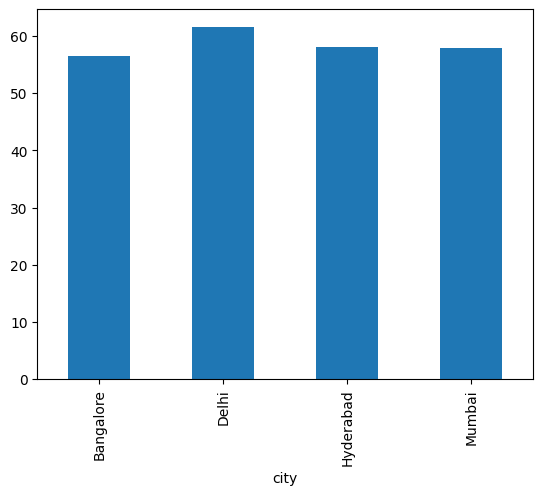

In [145]:
df.groupby("city")["occupied_percentage"].mean().plot(kind="bar")

In [147]:
df_date

date  mmm yy week no  day_type
0   01-May-22  May 22    W 19   weekend
1   02-May-22  May 22    W 19  weekeday
2   03-May-22  May 22    W 19  weekeday
3   04-May-22  May 22    W 19  weekeday
4   05-May-22  May 22    W 19  weekeday
..        ...     ...     ...       ...
87  27-Jul-22  Jul 22    W 31  weekeday
88  28-Jul-22  Jul 22    W 31  weekeday
89  29-Jul-22  Jul 22    W 31  weekeday
90  30-Jul-22  Jul 22    W 31   weekend
91  31-Jul-22  Jul 22    W 32   weekend

[92 rows x 4 columns]

In [148]:
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")

In [149]:
df.head(10)

property_id check_in_date room_category  successful_bookings  capacity  \
0        16559     10-May-22           RT1                   18      30.0   
1        16559     10-May-22           RT2                   25      41.0   
2        16559     10-May-22           RT3                   20      32.0   
3        16559     10-May-22           RT4                   13      18.0   
4        19562     10-May-22           RT1                   18      30.0   
5        19562     10-May-22           RT2                   15      23.0   
6        19562     10-May-22           RT3                   19      29.0   
7        19562     10-May-22           RT4                    9      14.0   
8        19563     10-May-22           RT1                   16      30.0   
9        19563     10-May-22           RT2                   25      45.0   

   occupied_percentage    room_class  property_name  category       city  \
0                60.00      Standard  Atliq Exotica    Luxury     Mumbai   
1                60.98         Elite  Atliq Exotica    Luxury     Mumbai   
2                62.50       Premium  Atliq Exotica    Luxury     Mumbai   
3                72.22  Presidential  Atliq Exotica    Luxury     Mumbai   
4                60.00      Standard      Atliq Bay    Luxury  Bangalore   
5                65.22         Elite      Atliq Bay    Luxury  Bangalore   
6                65.52       Premium      Atliq Bay    Luxury  Bangalore   
7                64.29  Presidential      Atliq Bay    Luxury  Bangalore   
8                53.33      Standard   Atliq Palace  Business  Bangalore   
9                55.56         Elite   Atliq Palace  Business  Bangalore   

        date  mmm yy week no  day_type  
0  10-May-22  May 22    W 20  weekeday  
1  10-May-22  May 22    W 20  weekeday  
2  10-May-22  May 22    W 20  weekeday  
3  10-May-22  May 22    W 20  weekeday  
4  10-May-22  May 22    W 20  weekeday  
5  10-May-22  May 22    W 20  weekeday  
6  10-May-22  May 22    W 20  weekeday  
7  10-May-22  May 22    W 20  weekeday  
8  10-May-22  May 22    W 20  weekeday  
9  10-May-22  May 22    W 20  weekeday

In [150]:
df["occupied_percentage"]

0       60.00
1       60.98
2       62.50
3       72.22
4       60.00
        ...  
6495    58.82
6496    73.33
6497    85.00
6498    70.83
6499    80.00
Name: occupied_percentage, Length: 6500, dtype: float64

In [151]:
df.groupby("day_type")["occupied_percentage"]

In [152]:
df.groupby("day_type")["occupied_percentage"].mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: occupied_percentage, dtype: float64

In [153]:
df['mmm yy']

0       May 22
1       May 22
2       May 22
3       May 22
4       May 22
         ...  
6495    Jul 22
6496    Jul 22
6497    Jul 22
6498    Jul 22
6499    Jul 22
Name: mmm yy, Length: 6500, dtype: object

In [154]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [155]:
df['mmm yy']=="Jun 22"

0       False
1       False
2       False
3       False
4       False
        ...  
6495    False
6496    False
6497    False
6498    False
6499    False
Name: mmm yy, Length: 6500, dtype: bool

In [156]:
df[df['mmm yy']=="Jun 22"]

property_id check_in_date room_category  successful_bookings  capacity  \
2200        16559     10-Jun-22           RT1                   20      30.0   
2201        16559     10-Jun-22           RT2                   26      41.0   
2202        16559     10-Jun-22           RT3                   20      32.0   
2203        16559     10-Jun-22           RT4                   11      18.0   
2204        19562     10-Jun-22           RT1                   19      30.0   
...           ...           ...           ...                  ...       ...   
4295        17564     30-Jun-22           RT4                    7      17.0   
4296        18560     30-Jun-22           RT1                   18      30.0   
4297        18560     30-Jun-22           RT2                   24      40.0   
4298        18560     30-Jun-22           RT3                   14      24.0   
4299        18560     30-Jun-22           RT4                    8      15.0   

      occupied_percentage    room_class  property_name  category       city  \
2200                66.67      Standard  Atliq Exotica    Luxury     Mumbai   
2201                63.41         Elite  Atliq Exotica    Luxury     Mumbai   
2202                62.50       Premium  Atliq Exotica    Luxury     Mumbai   
2203                61.11  Presidential  Atliq Exotica    Luxury     Mumbai   
2204                63.33      Standard      Atliq Bay    Luxury  Bangalore   
...                   ...           ...            ...       ...        ...   
4295                41.18  Presidential  Atliq Seasons  Business     Mumbai   
4296                60.00      Standard     Atliq City  Business  Hyderabad   
4297                60.00         Elite     Atliq City  Business  Hyderabad   
4298                58.33       Premium     Atliq City  Business  Hyderabad   
4299                53.33  Presidential     Atliq City  Business  Hyderabad   

           date  mmm yy week no  day_type  
2200  10-Jun-22  Jun 22    W 24  weekeday  
2201  10-Jun-22  Jun 22    W 24  weekeday  
2202  10-Jun-22  Jun 22    W 24  weekeday  
2203  10-Jun-22  Jun 22    W 24  weekeday  
2204  10-Jun-22  Jun 22    W 24  weekeday  
...         ...     ...     ...       ...  
4295  30-Jun-22  Jun 22    W 27  weekeday  
4296  30-Jun-22  Jun 22    W 27  weekeday  
4297  30-Jun-22  Jun 22    W 27  weekeday  
4298  30-Jun-22  Jun 22    W 27  weekeday  
4299  30-Jun-22  Jun 22    W 27  weekeday  

[2100 rows x 14 columns]

In [157]:
df_june_22=df[df['mmm yy']=="Jun 22"]
df_june_22.head(10)

property_id check_in_date room_category  successful_bookings  capacity  \
2200        16559     10-Jun-22           RT1                   20      30.0   
2201        16559     10-Jun-22           RT2                   26      41.0   
2202        16559     10-Jun-22           RT3                   20      32.0   
2203        16559     10-Jun-22           RT4                   11      18.0   
2204        19562     10-Jun-22           RT1                   19      30.0   
2205        19562     10-Jun-22           RT2                   15      23.0   
2206        19562     10-Jun-22           RT3                   17      29.0   
2207        19562     10-Jun-22           RT4                   10      14.0   
2208        19563     10-Jun-22           RT1                   17      30.0   
2209        19563     10-Jun-22           RT2                   23      45.0   

      occupied_percentage    room_class  property_name  category       city  \
2200                66.67      Standard  Atliq Exotica    Luxury     Mumbai   
2201                63.41         Elite  Atliq Exotica    Luxury     Mumbai   
2202                62.50       Premium  Atliq Exotica    Luxury     Mumbai   
2203                61.11  Presidential  Atliq Exotica    Luxury     Mumbai   
2204                63.33      Standard      Atliq Bay    Luxury  Bangalore   
2205                65.22         Elite      Atliq Bay    Luxury  Bangalore   
2206                58.62       Premium      Atliq Bay    Luxury  Bangalore   
2207                71.43  Presidential      Atliq Bay    Luxury  Bangalore   
2208                56.67      Standard   Atliq Palace  Business  Bangalore   
2209                51.11         Elite   Atliq Palace  Business  Bangalore   

           date  mmm yy week no  day_type  
2200  10-Jun-22  Jun 22    W 24  weekeday  
2201  10-Jun-22  Jun 22    W 24  weekeday  
2202  10-Jun-22  Jun 22    W 24  weekeday  
2203  10-Jun-22  Jun 22    W 24  weekeday  
2204  10-Jun-22  Jun 22    W 24  weekeday  
2205  10-Jun-22  Jun 22    W 24  weekeday  
2206  10-Jun-22  Jun 22    W 24  weekeday  
2207  10-Jun-22  Jun 22    W 24  weekeday  
2208  10-Jun-22  Jun 22    W 24  weekeday  
2209  10-Jun-22  Jun 22    W 24  weekeday

In [161]:
df_june_22.groupby("city")["occupied_percentage"].mean()

city
Bangalore    56.578552
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Name: occupied_percentage, dtype: float64

In [162]:
df_august=pd.read_csv("/content/drive/MyDrive/Hotel Analaysis project dataset/datasets/new_data_august.csv")

In [163]:
df_august.head(6)

property_id  property_name  category       city room_category room_class  \
0        16559  Atliq Exotica    Luxury     Mumbai           RT1   Standard   
1        19562      Atliq Bay    Luxury  Bangalore           RT1   Standard   
2        19563   Atliq Palace  Business  Bangalore           RT1   Standard   
3        19558   Atliq Grands    Luxury  Bangalore           RT1   Standard   
4        19560     Atliq City  Business  Bangalore           RT1   Standard   
5        17561      Atliq Blu    Luxury     Mumbai           RT1   Standard   

  check_in_date  mmm yy week no  day_type  successful_bookings  capacity  \
0     01-Aug-22  Aug-22    W 32  weekeday                   30        30   
1     01-Aug-22  Aug-22    W 32  weekeday                   21        30   
2     01-Aug-22  Aug-22    W 32  weekeday                   23        30   
3     01-Aug-22  Aug-22    W 32  weekeday                   30        40   
4     01-Aug-22  Aug-22    W 32  weekeday                   20        26   
5     01-Aug-22  Aug-22    W 32  weekeday                   18        26   

     occ%  
0  100.00  
1   70.00  
2   76.67  
3   75.00  
4   76.92  
5   69.23

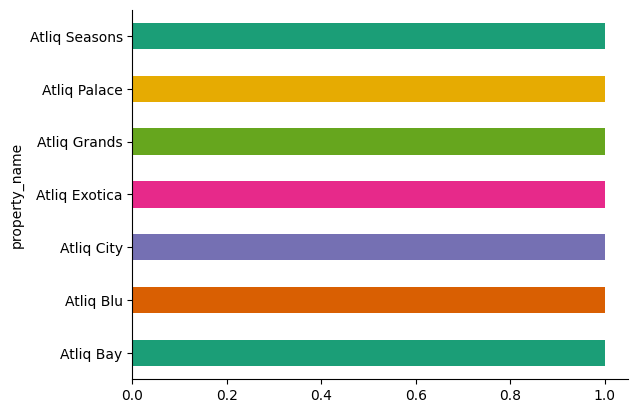

In [164]:
# @title property_name

from matplotlib import pyplot as plt
import seaborn as sns
df_august.groupby('property_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [165]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [166]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occupied_percentage', 'room_class', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [167]:
latest_df=pd.concat([df,df_august],ignore_index=True,axis=0)
latest_df.head(10)

property_id check_in_date room_category  successful_bookings  capacity  \
0        16559     10-May-22           RT1                   18      30.0   
1        16559     10-May-22           RT2                   25      41.0   
2        16559     10-May-22           RT3                   20      32.0   
3        16559     10-May-22           RT4                   13      18.0   
4        19562     10-May-22           RT1                   18      30.0   
5        19562     10-May-22           RT2                   15      23.0   
6        19562     10-May-22           RT3                   19      29.0   
7        19562     10-May-22           RT4                    9      14.0   
8        19563     10-May-22           RT1                   16      30.0   
9        19563     10-May-22           RT2                   25      45.0   

   occupied_percentage    room_class  property_name  category       city  \
0                60.00      Standard  Atliq Exotica    Luxury     Mumbai   
1                60.98         Elite  Atliq Exotica    Luxury     Mumbai   
2                62.50       Premium  Atliq Exotica    Luxury     Mumbai   
3                72.22  Presidential  Atliq Exotica    Luxury     Mumbai   
4                60.00      Standard      Atliq Bay    Luxury  Bangalore   
5                65.22         Elite      Atliq Bay    Luxury  Bangalore   
6                65.52       Premium      Atliq Bay    Luxury  Bangalore   
7                64.29  Presidential      Atliq Bay    Luxury  Bangalore   
8                53.33      Standard   Atliq Palace  Business  Bangalore   
9                55.56         Elite   Atliq Palace  Business  Bangalore   

        date  mmm yy week no  day_type  occ%  
0  10-May-22  May 22    W 20  weekeday   NaN  
1  10-May-22  May 22    W 20  weekeday   NaN  
2  10-May-22  May 22    W 20  weekeday   NaN  
3  10-May-22  May 22    W 20  weekeday   NaN  
4  10-May-22  May 22    W 20  weekeday   NaN  
5  10-May-22  May 22    W 20  weekeday   NaN  
6  10-May-22  May 22    W 20  weekeday   NaN  
7  10-May-22  May 22    W 20  weekeday   NaN  
8  10-May-22  May 22    W 20  weekeday   NaN  
9  10-May-22  May 22    W 20  weekeday   NaN

In [168]:
latest_df.shape

(6507, 15)

In [169]:
df_bookings.head()

booking_id  property_id booking_date check_in_date checkout_date  \
1  May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
4  May012216558RT15        16558     27-04-22      1/5/2022      2/5/2022   
5  May012216558RT16        16558     1/5/2022      1/5/2022      3/5/2022   
6  May012216558RT17        16558     28-04-22      1/5/2022      6/5/2022   
7  May012216558RT18        16558     26-04-22      1/5/2022      3/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
1        2.0           RT1           others            NaN      Cancelled   
4        4.0           RT1    direct online            5.0    Checked Out   
5        2.0           RT1           others            4.0    Checked Out   
6        2.0           RT1           others            NaN      Cancelled   
7        2.0           RT1          logtrip            NaN        No Show   

   revenue_generated  revenue_realized  
1               9100              3640  
4              10920             10920  
5               9100              9100  
6               9100              3640  
7               9100              9100

In [170]:
df_hotels.head(4)

property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi

In [171]:
df_bookings_all=pd.merge(df_bookings,df_hotels,on="property_id")

In [172]:
df_bookings_all

booking_id  property_id booking_date check_in_date  \
0        May012216558RT12        16558     30-04-22      1/5/2022   
1        May012216558RT15        16558     27-04-22      1/5/2022   
2        May012216558RT16        16558     1/5/2022      1/5/2022   
3        May012216558RT17        16558     28-04-22      1/5/2022   
4        May012216558RT18        16558     26-04-22      1/5/2022   
...                   ...          ...          ...           ...   
134568   Jul312217564RT45        17564     30-07-22      31-07-22   
134569   Jul312217564RT46        17564     29-07-22      31-07-22   
134570   Jul312217564RT48        17564     30-07-22      31-07-22   
134571   Jul312217564RT49        17564     29-07-22      31-07-22   
134572  Jul312217564RT410        17564     31-07-22      31-07-22   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
0           2/5/2022        2.0           RT1           others            NaN   
1           2/5/2022        4.0           RT1    direct online            5.0   
2           3/5/2022        2.0           RT1           others            4.0   
3           6/5/2022        2.0           RT1           others            NaN   
4           3/5/2022        2.0           RT1          logtrip            NaN   
...              ...        ...           ...              ...            ...   
134568      1/8/2022        2.0           RT4           others            2.0   
134569      3/8/2022        1.0           RT4     makeyourtrip            2.0   
134570      2/8/2022        1.0           RT4         tripster            NaN   
134571      1/8/2022        2.0           RT4          logtrip            2.0   
134572      1/8/2022        2.0           RT4     makeyourtrip            NaN   

       booking_status  revenue_generated  revenue_realized  property_name  \
0           Cancelled               9100              3640   Atliq Grands   
1         Checked Out              10920             10920   Atliq Grands   
2         Checked Out               9100              9100   Atliq Grands   
3           Cancelled               9100              3640   Atliq Grands   
4             No Show               9100              9100   Atliq Grands   
...               ...                ...               ...            ...   
134568    Checked Out              32300             32300  Atliq Seasons   
134569    Checked Out              32300             32300  Atliq Seasons   
134570      Cancelled              32300             12920  Atliq Seasons   
134571    Checked Out              32300             32300  Atliq Seasons   
134572      Cancelled              32300             12920  Atliq Seasons   

        category    city  
0         Luxury   Delhi  
1         Luxury   Delhi  
2         Luxury   Delhi  
3         Luxury   Delhi  
4         Luxury   Delhi  
...          ...     ...  
134568  Business  Mumbai  
134569  Business  Mumbai  
134570  Business  Mumbai  
134571  Business  Mumbai  
134572  Business  Mumbai  

[134573 rows x 15 columns]

In [173]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

In [174]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [175]:
df_date.head(5)

date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday

In [178]:
pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")

Empty DataFrame
Columns: [booking_id, property_id, booking_date, check_in_date, checkout_date, no_guests, room_category, booking_platform, ratings_given, booking_status, revenue_generated, revenue_realized, property_name, category, city, date, mmm yy, week no, day_type]
Index: []

In [190]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [180]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [181]:
df_date["date"]=pd.to_datetime(df_date["date"])
df_date.head(3)

<ipython-input-181-6e27300548a4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])


date  mmm yy week no  day_type
0 2022-05-01  May 22    W 19   weekend
1 2022-05-02  May 22    W 19  weekeday
2 2022-05-03  May 22    W 19  weekeday

In [183]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [196]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], format='mixed')


In [198]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [199]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

booking_id  property_id booking_date check_in_date checkout_date  \
0  May052216558RT11        16558     15-04-22    2022-05-05      7/5/2022   
1  May052216558RT12        16558     30-04-22    2022-05-05      7/5/2022   
2  May052216558RT13        16558     1/5/2022    2022-05-05      6/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0        3.0           RT1         tripster            5.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        3.0           RT1   direct offline            5.0    Checked Out   

   revenue_generated  revenue_realized property_name category   city  \
0              10010             10010  Atliq Grands   Luxury  Delhi   
1               9100              3640  Atliq Grands   Luxury  Delhi   
2              10010             10010  Atliq Grands   Luxury  Delhi   

        date  mmm yy week no  day_type  
0 2022-05-05  May 22    W 19  weekeday  
1 2022-05-05  May 22    W 19  weekeday  
2 2022-05-05  May 22    W 19  weekeday

In [200]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64